In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [11]:
def read_circular_t(filename):
    d = pd.read_table(
        filename, 
        sep=r'\s+',
        skiprows=2,
        skipfooter=1,
        usecols=[0, 1],
        names=['mjd', 'utcdiff'],
        na_values=['-'],
        engine='python'
    )
    return d.dropna()

In [12]:
def read_circular_t_files():
    frames = dict()
    for k in ['ptb', 'dtag', 'npl', 'roa', 'nist', 'usno', 'estc', 'op']:
        url = 'ftp://ftp2.bipm.org/pub/tai/publication/utclab/utc-{}'.format(k)
        frames[k] = read_circular_t(url)
    return pd.concat(frames).reset_index(level=0).rename(columns={'level_0': 'k'})

In [13]:
d = read_circular_t_files()

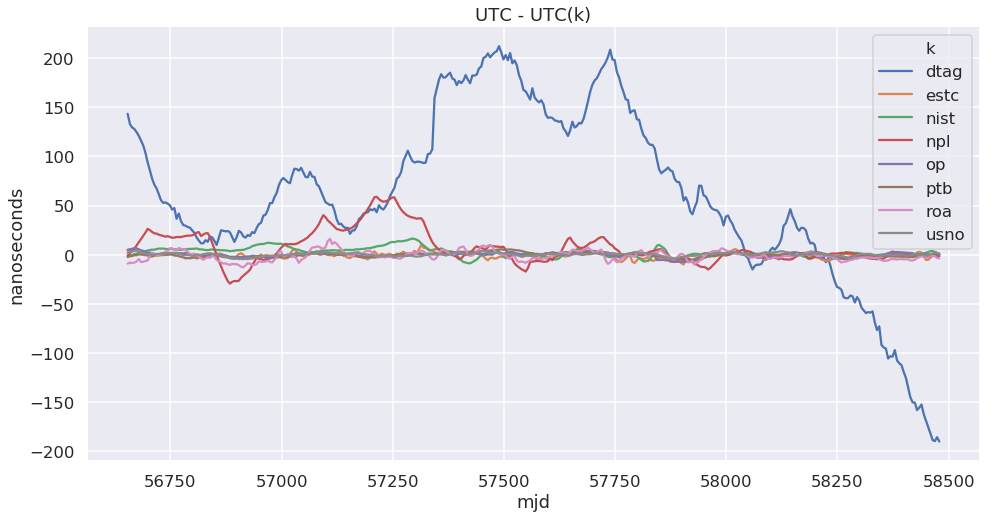

In [14]:
plt.rcParams['figure.figsize'] = [16, 8]
sns.set()
sns.set_context("talk")

g = sns.lineplot('mjd', 'utcdiff', data=d.query("mjd > 56650"), hue='k')
g.set_title("UTC - UTC(k)")
g.set_ylabel("nanoseconds");